In [1]:
# E3.ipynb

import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# To ensure reproducibility
np.random.seed(42)

# Read data from Excel file
file_path = 'E3.xlsx'
train_data = pd.read_excel(file_path, sheet_name='train')
test_data = pd.read_excel(file_path, sheet_name='test')

In [3]:
# Separate features and target variable in train data
X_train = train_data.drop(columns=['y'])
y_train = train_data['y']

# Separate features and target variable in test data
X_test = test_data.drop(columns=['y'])
y_test = test_data['y']

In [4]:
# Adding outliers (UNCOMMENT ONLY WHEN REQUIRED! SEE THE PROBLEM STATEMENTs ...)
X_train = np.array(list(X_train['x1']) + [X_train['x1'].mean() + x for x in np.random.randn(5)]).reshape(-1,1)
y_train = np.array(list(y_train) + [y_train.max() + 4 + x for x in np.random.randn(5)])

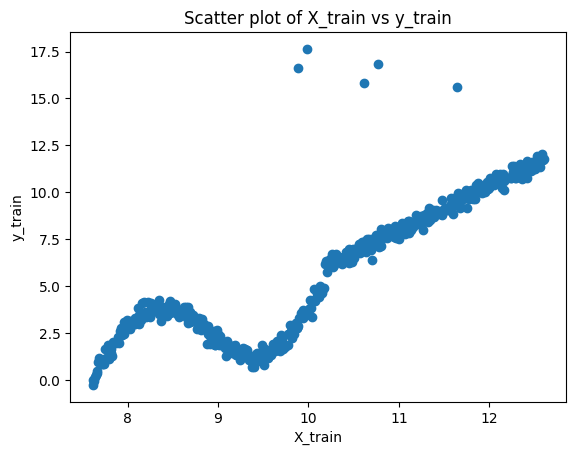

In [5]:
plt.scatter(X_train, y_train)
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.title('Scatter plot of X_train vs y_train')
plt.show()

In [6]:
# Use PolynomialFeatures to create features
poly = PolynomialFeatures(degree=6)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


/Users/sagnikdey/Desktop/assignment e3/1/E3-24B2477/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


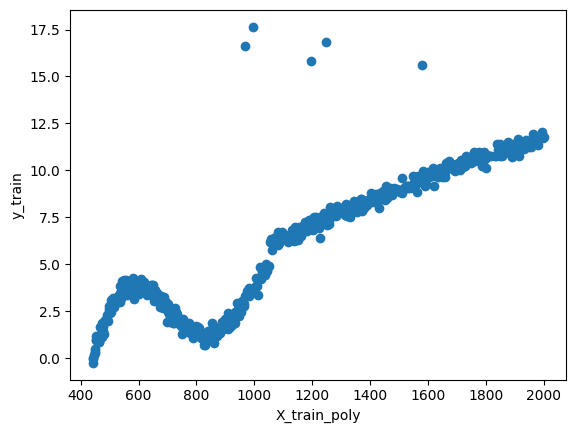

In [7]:
plt.scatter(X_train_poly[:,3], y_train)     
plt.xlabel('X_train_poly')
plt.ylabel('y_train')    
plt.show()

In [8]:
print(X_train)

[[ 7.61428571]
 [ 7.62142857]
 [ 7.62857143]
 [ 7.64285714]
 [ 7.65      ]
 [ 7.65714286]
 [ 7.66428571]
 [ 7.67142857]
 [ 7.67857143]
 [ 7.68571429]
 [ 7.71428571]
 [ 7.72142857]
 [ 7.72857143]
 [ 7.74285714]
 [ 7.75      ]
 [ 7.75714286]
 [ 7.77857143]
 [ 7.78571429]
 [ 7.79285714]
 [ 7.8       ]
 [ 7.81428571]
 [ 7.82142857]
 [ 7.82857143]
 [ 7.84285714]
 [ 7.85      ]
 [ 7.87142857]
 [ 7.89285714]
 [ 7.9       ]
 [ 7.91428571]
 [ 7.92142857]
 [ 7.92857143]
 [ 7.93571429]
 [ 7.94285714]
 [ 7.95      ]
 [ 7.95714286]
 [ 7.96428571]
 [ 7.97142857]
 [ 7.97857143]
 [ 7.98571429]
 [ 7.99285714]
 [ 8.        ]
 [ 8.01428571]
 [ 8.02142857]
 [ 8.02857143]
 [ 8.04285714]
 [ 8.05      ]
 [ 8.05714286]
 [ 8.07142857]
 [ 8.07857143]
 [ 8.08571429]
 [ 8.1       ]
 [ 8.10714286]
 [ 8.11428571]
 [ 8.12142857]
 [ 8.12857143]
 [ 8.13571429]
 [ 8.14285714]
 [ 8.15      ]
 [ 8.15714286]
 [ 8.17857143]
 [ 8.18571429]
 [ 8.19285714]
 [ 8.20714286]
 [ 8.21428571]
 [ 8.22142857]
 [ 8.24285714]
 [ 8.25   

In [9]:
print(X_train_poly)

[[1.00000000e+00 7.61428571e+00 5.79773469e+01 ... 3.36137276e+03
  2.55944526e+04 1.94883475e+05]
 [1.00000000e+00 7.62142857e+00 5.80861735e+01 ... 3.37400355e+03
  2.57147270e+04 1.95982955e+05]
 [1.00000000e+00 7.62857143e+00 5.81951020e+01 ... 3.38666990e+03
  2.58354532e+04 1.97087600e+05]
 ...
 [1.00000000e+00 1.07700817e+01 1.15994659e+02 ... 1.34547609e+04
  1.44908873e+05 1.56068040e+06]
 [1.00000000e+00 1.16454230e+01 1.35615876e+02 ... 1.83916659e+04
  2.14178728e+05 2.49420189e+06]
 [1.00000000e+00 9.88823974e+00 9.77772852e+01 ... 9.56039750e+03
  9.45355026e+04 9.34789714e+05]]


In [10]:
# standardization of the data
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

In [11]:
poly.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6'], dtype=object)

In [12]:
####################################
# Save the augmented data set to a file for review

# Create dataframe with test data and additional features
# Get feature names
feature_names = poly.get_feature_names_out()
augmented_data = pd.DataFrame(X_train_poly, columns=feature_names)
augmented_data['y'] = train_data['y']

# # Write dataframe to CSV
augmented_data.to_csv('augmented_train_data.csv', index=False)
####################################
####################################
# Save the augmented data set to a file for review

# Create dataframe with test data and additional features
# Get feature names
feature_names = poly.get_feature_names_out()
augmented_data = pd.DataFrame(X_test_poly, columns=feature_names)
augmented_data['y'] = test_data['y']

# # Write dataframe to CSV
augmented_data.to_csv('augmented_test_data.csv', index=False)
####################################

In [13]:
# Algorithms
algorithms = {
    'Linear Regression': LinearRegression(),
    'SVM Regression': SVR(kernel='poly'), 
    'SVM Regression rbf': SVR(kernel='rbf'),  # Adjust kernel as needed
    'RandomForest': RandomForestRegressor(),
    'XGBoost': GradientBoostingRegressor(),
    'knn': KNeighborsRegressor(),
    'Neural Network-10': MLPRegressor(hidden_layer_sizes=[10], max_iter=20000),
}

# Metric tables
metric_table_train = pd.DataFrame()
metric_table_test = pd.DataFrame()

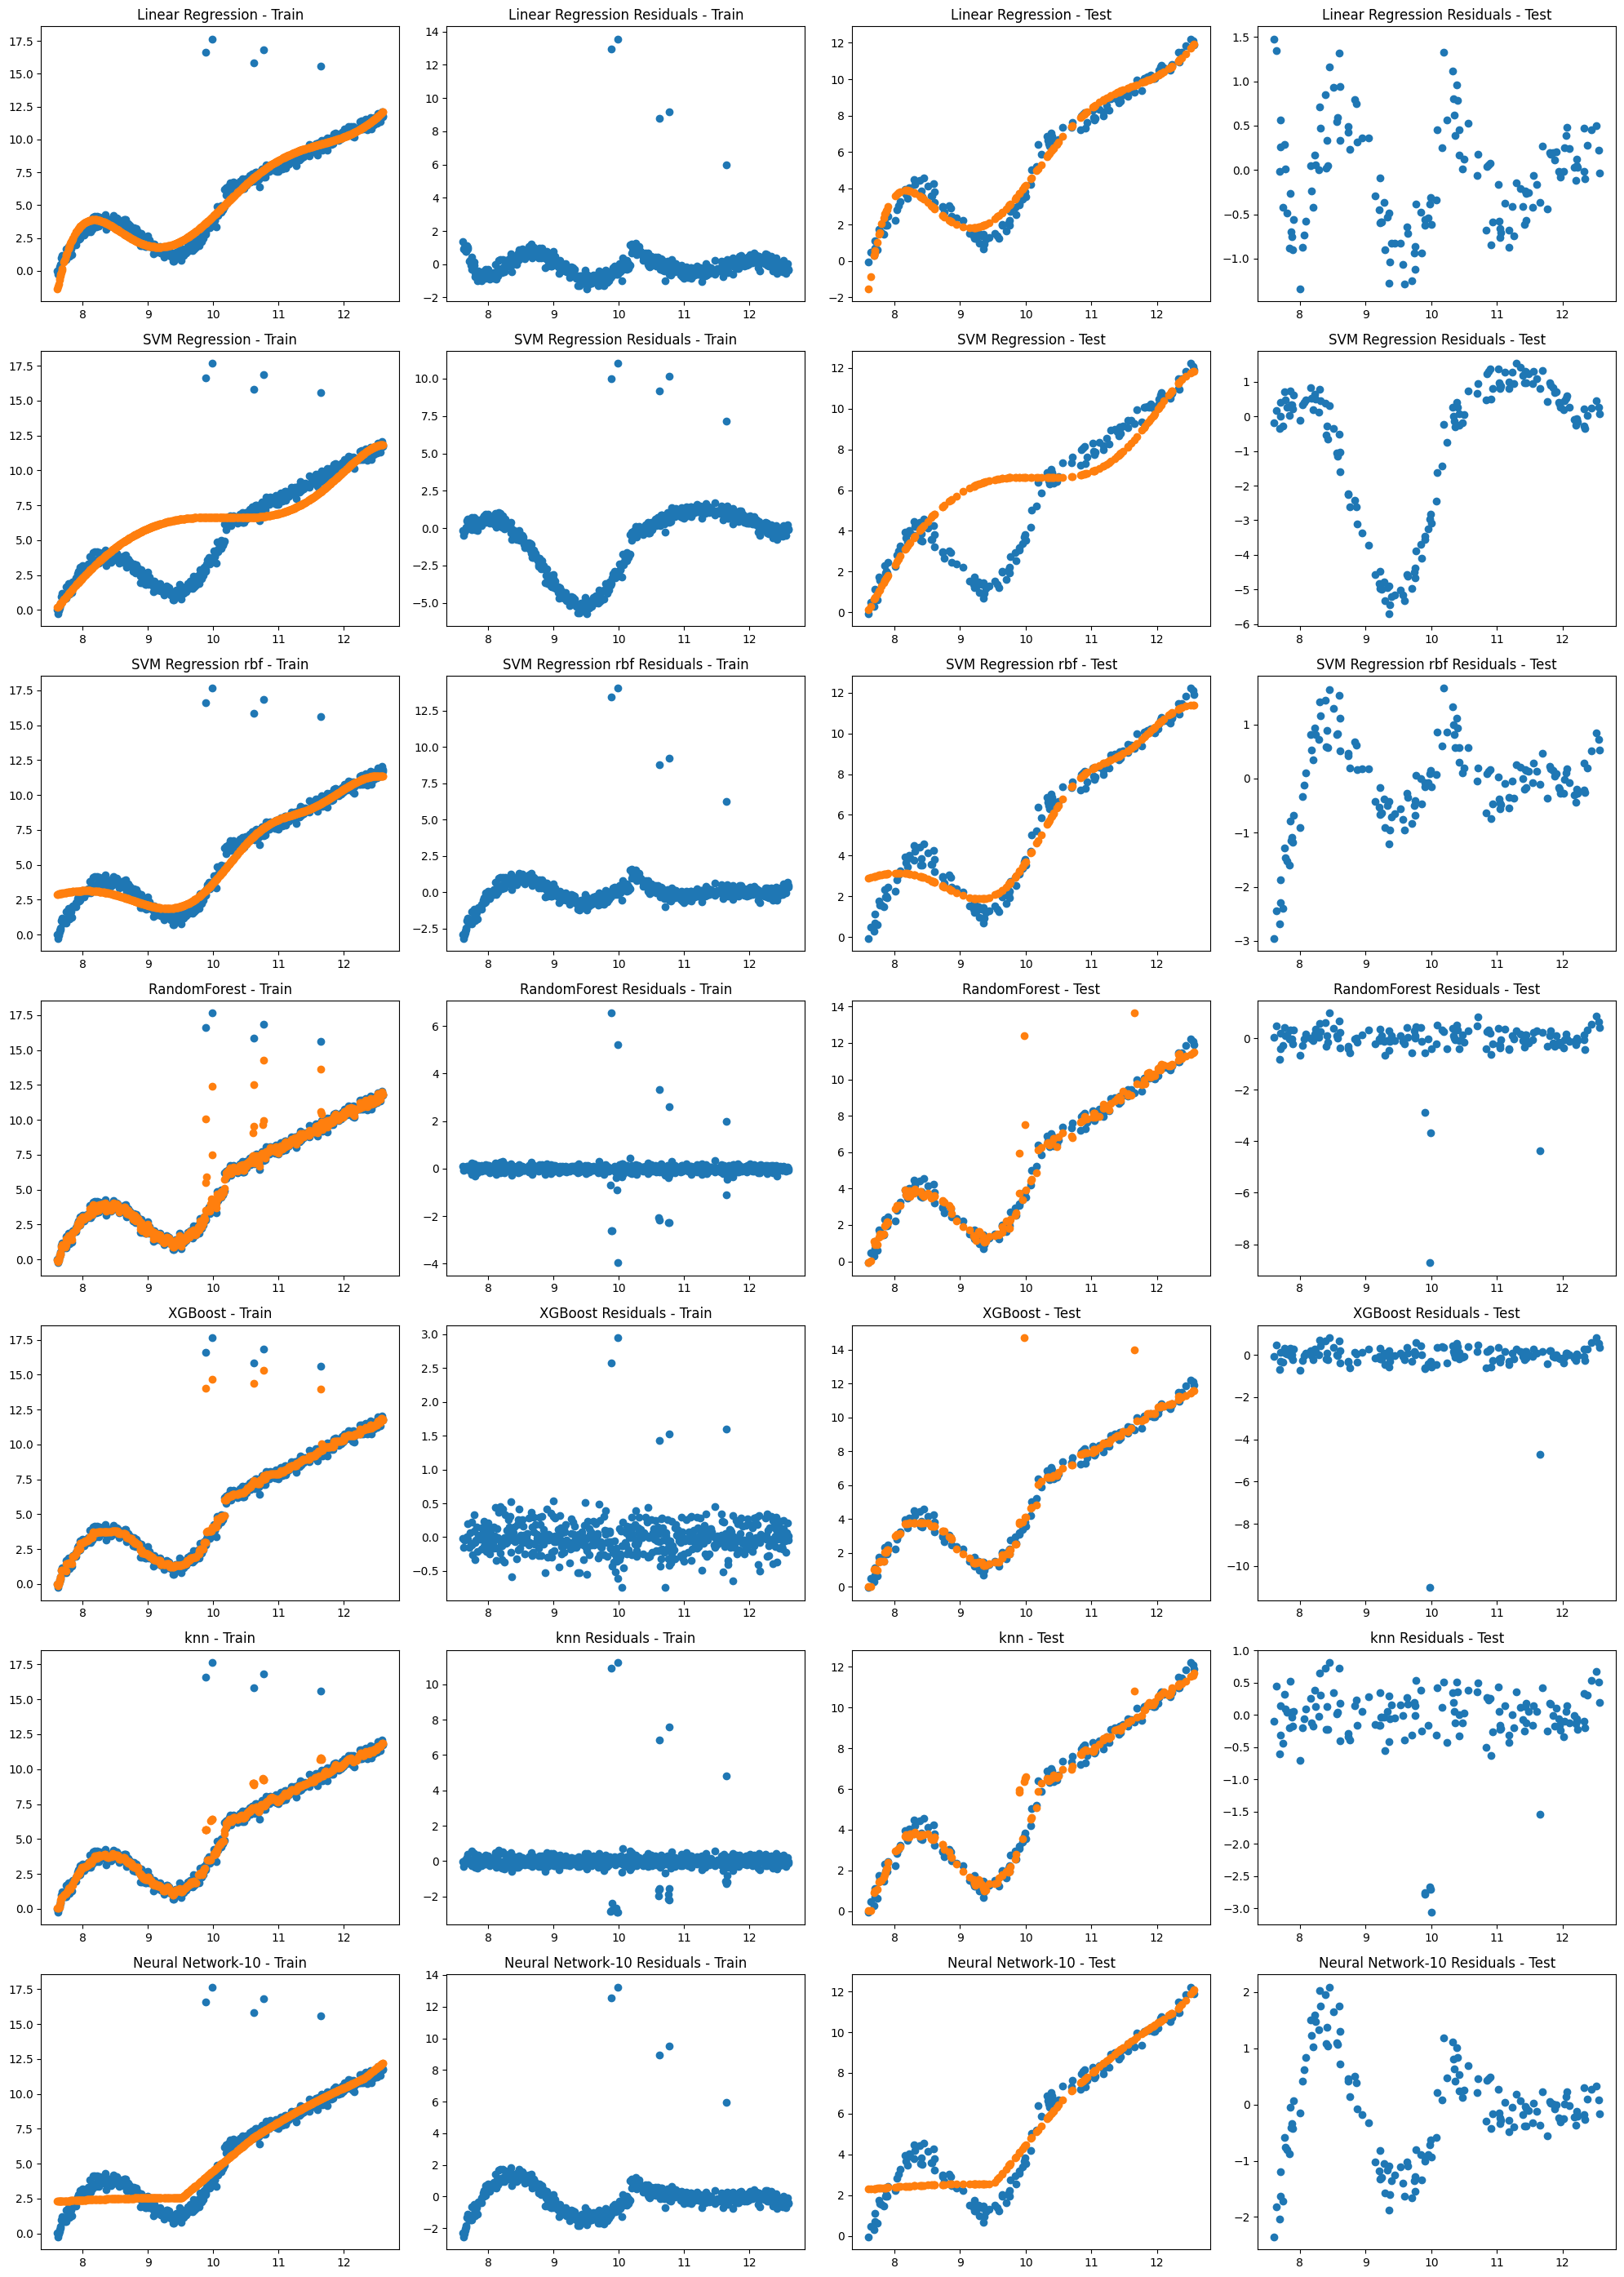

In [14]:
# Create a grid of subplots
fig, axs = plt.subplots(len(algorithms), 4, figsize=(20, 4 * len(algorithms)))
fig_row = -1

# Run the algorithms ... create metrics and plots
for algorithm_name, algorithm in algorithms.items():

    # Train model
    algorithm.fit(X_train_poly, y_train)

    # Train predictions
    y_train_pred = algorithm.predict(X_train_poly)

    # Test predictions
    y_test_pred = algorithm.predict(X_test_poly)

    # Train metrics
    r2_train = algorithm.score(X_train_poly, y_train)
    rmse_train = root_mean_squared_error(y_train, y_train_pred)

    # Test metrics
    r2_test = algorithm.score(X_test_poly, y_test)
    rmse_test = root_mean_squared_error(y_test, y_test_pred)

    # Additional metrics using statsmodels for all algorithms
    residuals_train = y_train - y_train_pred
    residuals_test = y_test - y_test_pred

    durbin_watson_stat_train = sm.stats.durbin_watson(residuals_train)
    jb_stat_train, jb_p_value_train, _, _ = sm.stats.jarque_bera(residuals_train)

    durbin_watson_stat_test = sm.stats.durbin_watson(residuals_test)
    jb_stat_test, jb_p_value_test, _, _ = sm.stats.jarque_bera(residuals_test)

    # Update metric tables
    metric_table_train.at[algorithm_name, 'R-squared'] = r2_train
    metric_table_train.at[algorithm_name, 'RMSE'] = rmse_train
    metric_table_train.at[algorithm_name, 'Durbin-Watson'] = durbin_watson_stat_train
    metric_table_train.at[algorithm_name, 'Jarque-Bera'] = jb_stat_train
    metric_table_train.at[algorithm_name, 'JB P-value'] = jb_p_value_train

    metric_table_test.at[algorithm_name, 'R-squared'] = r2_test
    metric_table_test.at[algorithm_name, 'RMSE'] = rmse_test
    metric_table_test.at[algorithm_name, 'Durbin-Watson'] = durbin_watson_stat_test
    metric_table_test.at[algorithm_name, 'Jarque-Bera'] = jb_stat_test
    metric_table_test.at[algorithm_name, 'JB P-value'] = jb_p_value_test

    # Create the plots
    fig_row = fig_row+1

    axs[fig_row, 0].scatter(X_train, y_train)
    axs[fig_row, 0].scatter(X_train, y_train_pred)
    axs[fig_row, 0].set_title(algorithm_name + " - Train")

    axs[fig_row, 1].scatter(X_train, residuals_train)
    axs[fig_row, 1].set_title(algorithm_name + " Residuals - Train")

    axs[fig_row, 2].scatter(X_test, y_test)
    axs[fig_row, 2].scatter(X_test, y_test_pred)
    axs[fig_row, 2].set_title(algorithm_name + " - Test")

    axs[fig_row, 3].scatter(X_test, residuals_test)
    axs[fig_row, 3].set_title(algorithm_name + " Residuals - Test")
############################

plt.tight_layout()
plt.show()

In [15]:
# Display the metrics' Tables
print("Metrics - Train Data:\n")
print(metric_table_train.to_string())
print("-------------------------------------------------")

print("Metrics - Test Data:\n")
print(metric_table_test.to_string())

Metrics - Train Data:

                    R-squared      RMSE  Durbin-Watson    Jarque-Bera    JB P-value
Linear Regression    0.899544  1.137503       0.347445  151552.426489  0.000000e+00
SVM Regression       0.533769  2.450564       0.051834     151.685745  1.153079e-33
SVM Regression rbf   0.883184  1.226637       0.295585  101819.173759  0.000000e+00
RandomForest         0.978884  0.521517       0.763641  133426.250756  0.000000e+00
XGBoost              0.993643  0.286150       1.246634   29119.903663  0.000000e+00
knn                  0.932941  0.929382       0.495940  175594.587772  0.000000e+00
Neural Network-10    0.874660  1.270604       0.269759   54117.665379  0.000000e+00
-------------------------------------------------
Metrics - Test Data:

                    R-squared      RMSE  Durbin-Watson   Jarque-Bera     JB P-value
Linear Regression    0.970786  0.601799       0.491065      2.523623   2.831407e-01
SVM Regression       0.574131  2.297710       0.035652     27.322

we have to select beween RF XG KNN. The R2 are comaprable but the RMSE is least for Random forest by quite a margin. XG boost has its DW closest to 2. showing least auto correlation.  Knn give us the best normality distribution and its p value is 0.07 thus we cant reject H0(it is normal). For xg boost we have slight deviation from normal. Its p value is close to 0.06 thus we will go with normality. We reject random forest method. it has low p value.


thus it bolis down to knn and xg boost .  knn -  less r2,more rmse,more durbin,, less jb, ok p value. 
i will choose. xg boost as it has less durbin as eroor coorelation is less.


rf and xgboost are most affeced by noise we should nt use that